In [20]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import math as math
from matplotlib import pyplot as plt
from sympy.abc import t
from IPython.display import display, Math, Latex
import numpy as np
%matplotlib inline
x, y, z, u, c = symbols('x y z u c')
sp.init_printing() 

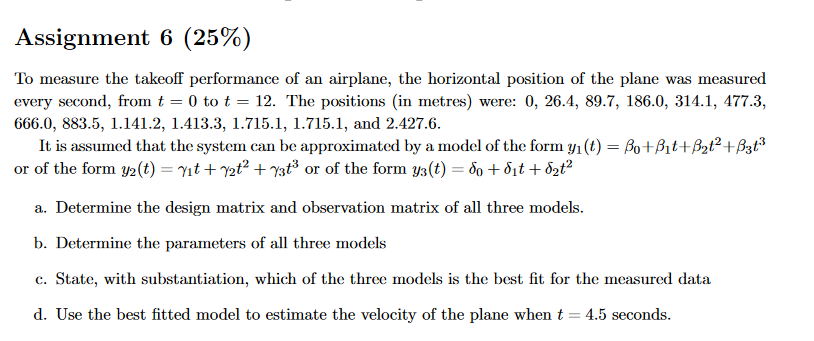

In [ ]:
#a)
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y = np.array([0, 26.4, 89.7, 186.0, 314.1, 477.3, 666.0, 883.5, 1141.2, 1413.3, 1715.1, 1715.1, 2527.6])
X1 = Matrix([ones(len(x), 1)]).row_join(Matrix(x)).row_join(Matrix(x**2)).row_join(Matrix(x**3))
X2 = Matrix(x).row_join(Matrix(x**2)).row_join(Matrix(x**3))
X3 = Matrix([ones(len(x), 1)]).row_join(Matrix(x)).row_join(Matrix(x**2))

display(Math(r'X_1 = ' + latex(X1) + r'\quad X_2 = ' + latex(X2) + r'\quad X_3 = ' + latex(X3) + r'\quad y = ' + latex(Matrix(y))))

# b)
X1tX1 = X1.T*X1
X1ty = X1.T*Matrix(y)
Mat, _ = X1tX1.row_join(X1ty).rref()
B1 = Mat[:,-1]
display(Latex("$$y_1(t) = {}+{}t+{}t^2+{}t^3$$".format(round(B1[0],2), round(B1[1], 4), round(B1[2], 4), round(B1[3], 4))))

X2tX2 = X2.T*X2
X2ty = X2.T*Matrix(y)
Mat, _ = X2tX2.row_join(X2ty).rref()
B2 = Mat[:,-1]
display(Latex("$$y_2(t) = {}t+{}t^2+{}t^3$$".format(round(B2[0],2), round(B2[1], 4), round(B2[2], 4))))

X3tX3 = X3.T*X3
X3ty = X3.T*Matrix(y)
Mat, _ = X3tX3.row_join(X3ty).rref()
B3 = Mat[:,-1]
display(Latex("$$y_3(t) = {}+{}t+{}t^2$$".format(round(B3[0],2), round(B3[1], 4), round(B3[2], 4))))

# c)
display(Latex("$$e_1 = {}$$".format(round((Matrix(y)-X1*B1).norm(), 2))))
display(Latex("$$e_2 = {}$$".format(round((Matrix(y)-X2*B2).norm(), 2))))
display(Latex("$$e_3 = {}$$".format(round((Matrix(y)-X3*B3).norm(), 2))))

# d)
y45 = B1[1]+2*B1[2]*4.5+3*B1[3]*4.5**2
display(Latex("$$y_3'(4.5) = {} \\ m/s = {} \\ km/h$$".format(round(y45, 2), round(y45*3.6, 2))))



<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

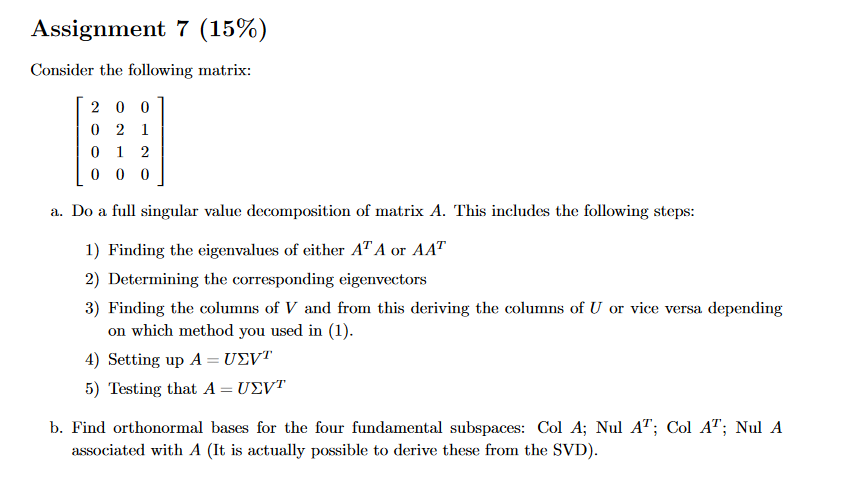

In [37]:
A = Matrix([[2,0,0],[0,2,1],[0,1,2],[0,0,0]])
AtA = A.T*A
vecs1 = AtA.eigenvects()
s1 = sqrt(vecs1[2][0])
s2 = sqrt(vecs1[1][0])
s3 = sqrt(vecs1[0][0])
v1 = vecs1[2][2][0].normalized()
v2 = vecs1[1][2][0].normalized()
v3 = vecs1[0][2][0].normalized()

A = Matrix([[2,0,0],[0,2,1],[0,1,2],[0,0,0]])
AAt = A*A.T
vecs2 = AAt.eigenvects()
vecs2
u1 = vecs2[3][2][0].normalized()
u2 = vecs2[2][2][0].normalized()
u3 = vecs2[1][2][0].normalized()
u4 = vecs2[0][2][0].normalized()
U = u1.row_join(u2).row_join(u3).row_join(u4)
S = diag(s1, s2, s3).col_join(zeros(1,3))
V = v1.row_join(v2).row_join(v3)
Vt = V.T
display(Math('U \Sigma V^T = {}{}{}'.format(latex(U), latex(S), latex(Vt))))
display(Latex("Test:"))
display(U*S*Vt)
display(A)
#2

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

⎡2  0  0⎤
⎢       ⎥
⎢0  2  1⎥
⎢       ⎥
⎢0  1  2⎥
⎢       ⎥
⎣0  0  0⎦

⎡2  0  0⎤
⎢       ⎥
⎢0  2  1⎥
⎢       ⎥
⎢0  1  2⎥
⎢       ⎥
⎣0  0  0⎦

In [38]:
# b)
# The rank r of A is three since this is the number of nonzero singular values.
# The first three columns of U is an orthonormal basis for the column space
# The last column of U is an orthonormal basis for the left nullspace, i.e. the nullspace of A transpose
# The first three columns of V is is an orthonormal basis for the row space (= Column space of A transpose)
# Since V only has three columns, the null space of A must be empty as this would have been the remaining columns of V.
display(Math(r'Col A = ' + latex(U[:, 0]) + ' , ' + latex(U[:, 1]) + ' , ' + latex(U[:,
2])))
display(Math(r'Nul A^T = ' + latex(U[:, -1])))
display(Math(r'Col A^T = Row A = ' + latex(V[:, 0]) + ' , ' + latex(V[:, 1]) + ' , ' +
latex(V[:, 2])))
display(Math(r'Nul A = ' + latex([])))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

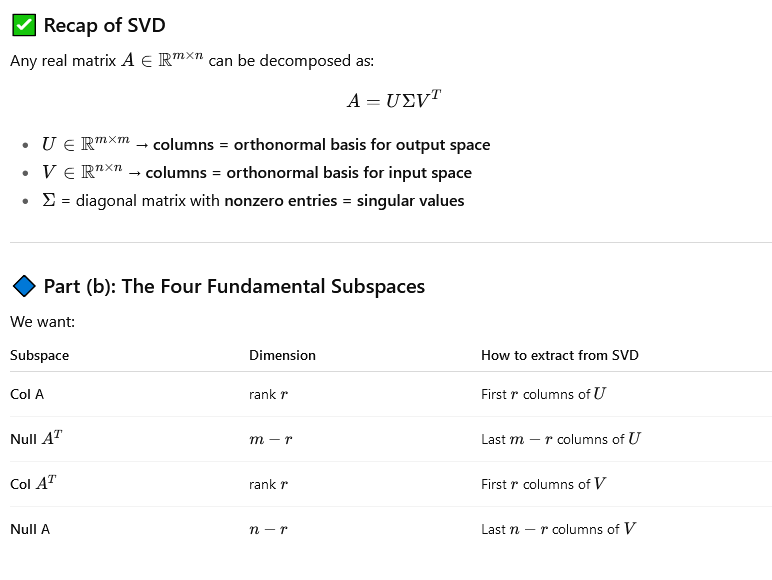